## Load Density Data

References:https://gdr.openei.org/submissions/1144

> **Objective:** To automate the extraction, storage and visualization (3D and 2D) of density and misfit models derived from gravity data at different elevation levels.

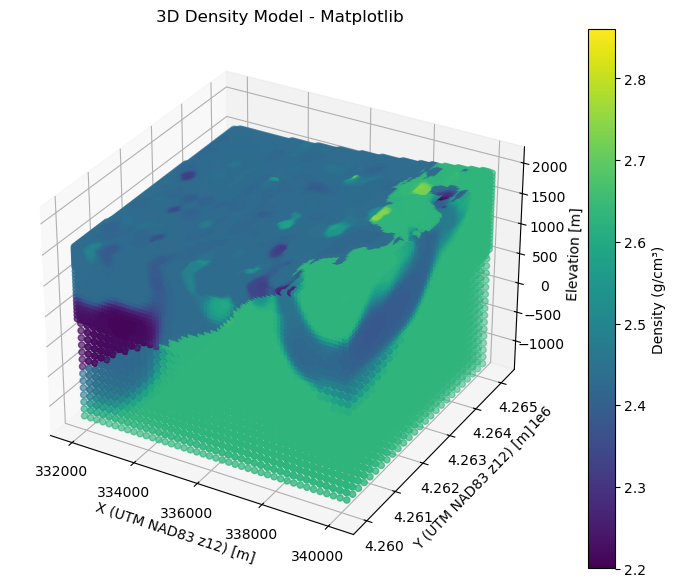

Widget(value='<iframe src="http://localhost:45741/index.html?ui=P_0x7c2809f7ac50_1&reconnect=auto" class="pyvi…

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv

# CSV file path
file_path = "/home/marcus/Documentos/qualificacao_mestrado/dados_forge/gravity_data/FORGE_3D_gravity (1)/FORGE_3D_gravity/DensityModel_Original_Top_Granite/UtahFORGE_1_Original_Top_Granite_Density_Model.csv"

# Load the CSV file properly, skipping the first line if necessary
df = pd.read_csv(file_path, sep=",", header=0)  # Agora ele lê o cabeçalho automaticamente

# Convert columns to the correct types (float)
df = df.astype({
    "X_UTMNAD83z12_m": float,
    "Y_UTMNAD83z12_m": float,
    "Z_Elevation_m": float,
    "Density_gcm3": float
})

# Function for 3D visualization with Matplotlib
def plot_matplotlib_3d(df):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df["X_UTMNAD83z12_m"], df["Y_UTMNAD83z12_m"], df["Z_Elevation_m"], 
                         c=df["Density_gcm3"], cmap="viridis", marker='o')
    fig.colorbar(scatter, ax=ax, label="Density (g/cm³)")

    ax.set_xlabel("X (UTM NAD83 z12) [m]")
    ax.set_ylabel("Y (UTM NAD83 z12) [m]")
    ax.set_zlabel("Elevation [m]")
    ax.set_title("3D Density Model - Matplotlib")

    plt.show()

# Function for 3D visualization with PyVista
def plot_pyvista_3d(df):
    cloud = pv.PolyData(np.c_[df["X_UTMNAD83z12_m"], df["Y_UTMNAD83z12_m"], df["Z_Elevation_m"]])
    cloud["Density"] = df["Density_gcm3"]

    plotter = pv.Plotter()
    plotter.add_mesh(cloud, scalars="Density", cmap="seismic", point_size=5, render_points_as_spheres=True)
    plotter.show_grid()
    plotter.show()

# Run the visualization functions
plot_matplotlib_3d(df)
plot_pyvista_3d(df)


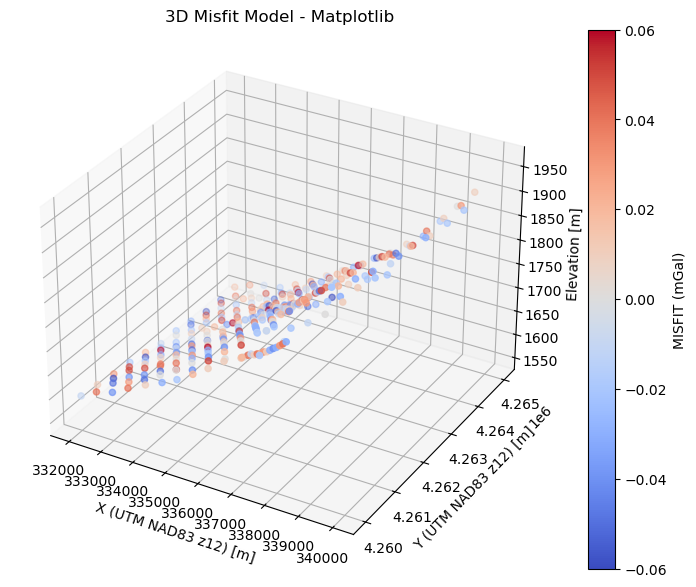

Widget(value='<iframe src="http://localhost:45741/index.html?ui=P_0x7c2804a71870_2&reconnect=auto" class="pyvi…

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv

# CSV file path
file_path = "/home/marcus/Documentos/qualificacao_mestrado/dados_forge/gravity_data/FORGE_3D_gravity (1)/FORGE_3D_gravity/DensityModel_Original_Top_Granite/UtahFORGE_1_Original_Top_Granite_Density_Model_MISFIT.csv"

# Load the CSV file (comma-separated values with header)
df_misfit = pd.read_csv(file_path, sep=",", header=0)

# Convert columns to the correct types (float)
df_misfit = df_misfit.astype({
    "X_UTMNAD83z12_m": float,
    "Y_UTMNAD83z12_m": float,
    "Z_Elevation_m": float,
    "MISFIT_mGal": float
})

# Function for 3D visualization with Matplotlib
def plot_matplotlib_3d_misfit(df):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df["X_UTMNAD83z12_m"], df["Y_UTMNAD83z12_m"], df["Z_Elevation_m"], 
                         c=df["MISFIT_mGal"], cmap="coolwarm", marker='o')
    fig.colorbar(scatter, ax=ax, label="MISFIT (mGal)")

    ax.set_xlabel("X (UTM NAD83 z12) [m]")
    ax.set_ylabel("Y (UTM NAD83 z12) [m]")
    ax.set_zlabel("Elevation [m]")
    ax.set_title("3D Misfit Model - Matplotlib")

    plt.show()

# Function for 3D visualization with PyVista
def plot_pyvista_3d_misfit(df):
    cloud = pv.PolyData(np.c_[df["X_UTMNAD83z12_m"], df["Y_UTMNAD83z12_m"], df["Z_Elevation_m"]])
    cloud["MISFIT"] = df["MISFIT_mGal"]

    plotter = pv.Plotter()
    plotter.add_mesh(cloud, scalars="MISFIT", cmap="coolwarm", point_size=5, render_points_as_spheres=True)
    plotter.show_grid()
    plotter.show()

# Run the visualization functions
plot_matplotlib_3d_misfit(df_misfit)
plot_pyvista_3d_misfit(df_misfit)


In [7]:
import os
# Base path to save files
save_dir = "/home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/original/"

# Rename DataFrame columns
df.rename(columns={
    "X_UTMNAD83z12_m": "Easting[m]",
    "Y_UTMNAD83z12_m": "Northing[m]",
    "Z_Elevation_m": "Elevation[m]",
    "Density_gcm3": "Density[g/cm3]"
}, inplace=True)

# List of specific elevation values
elevation_values = [1500, 1000, 500, 0, -500, -1000]

# Function to filter and save data by elevation
def filter_and_save_by_elevation(df, max_diff=50):
    """
    Filtra os dados do DataFrame com base na diferença entre a elevação específica e a coluna de elevação.
    Salva os resultados em arquivos CSV e cria DataFrames correspondentes.
    
    Parâmetros:
    df - DataFrame de entrada contendo as colunas renomeadas.
    max_diff - Diferença máxima permitida entre os valores de elevação específicos e os valores do DataFrame.
    """
    saved_dataframes = {}  # Dicionário para armazenar os DataFrames criados

    for elevation in elevation_values:
        # Calculate the absolute difference between the specific value and the entire column
        df_filtered = df[abs(df["Elevation[m]"] - elevation) <= max_diff].copy()

        # Reset the index
        df_filtered.reset_index(drop=True, inplace=True)

        # Create file name
        elevation_str = str(elevation).replace("-", "minus")  # Substituir '-' por 'minus'
        file_name = f"density_original_{elevation_str}m.csv"

        # Full file path
        file_path = os.path.join(save_dir, file_name)

        # Save to CSV without index
        df_filtered.to_csv(file_path, index=False)

        # Store the DataFrame in the dictionary
        saved_dataframes[elevation] = df_filtered

        print(f"Arquivo salvo: {file_path} ({len(df_filtered)} linhas)")

    return saved_dataframes

# Execute the function and store the created DataFrames
saved_dfs = filter_and_save_by_elevation(df, max_diff=50)

Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1500m.csv (55885 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1000m.csv (8798 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_500m.csv (7183 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_0m.csv (0 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_minus500m.csv (1092 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_minus1

In [17]:
import pandas as pd
import os

# Base path to save files
save_dir = "/home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/"

# Rename DataFrame columns
df.rename(columns={
    "Easting[m]": "Easting[m]",
    "Northing[m]": "Northing[m]",
    "Elevation[m]": "Elevation[m]",
    "Density[g/cm3]": "Density[g/cm3]"
}, inplace=True)

# List of specific elevation values
elevation_values = [1500, 1000, 500, 0, -500, -1000]

# Create a dictionary to store separate DataFrame variables
globals().update({})

# Function to filter and save data by elevation
def filter_and_save_by_elevation(df, max_diff=50):
    """
    Filtra os dados do DataFrame com base na diferença entre a elevação específica e a coluna de elevação.
    Salva os resultados em arquivos CSV e cria DataFrames correspondentes com variáveis separadas.
    
    Parâmetros:
    df - DataFrame de entrada contendo as colunas renomeadas.
    max_diff - Diferença máxima permitida entre os valores de elevação específicos e os valores do DataFrame.
    """
    for elevation in elevation_values:
        # Calculate the absolute difference between the specific value and the entire column
        df_filtered = df[abs(df["Elevation[m]"] - elevation) <= max_diff].copy()

        # Reset the index
        df_filtered.reset_index(drop=True, inplace=True)

        # Create file name
        elevation_str = str(elevation).replace("-", "minus")  # Substituir '-' por 'minus'
        file_name = f"density_original_{elevation_str}m.csv"

        # Full file path
        file_path = os.path.join(save_dir, file_name)

        # Save to CSV without index
        df_filtered.to_csv(file_path, index=False)

        # Create separate variables for each DataFrame
        globals()[f"df_density_original_{elevation_str}m"] = df_filtered

        print(f"Arquivo salvo: {file_path} ({len(df_filtered)} linhas)")

# Execute the function to create the files and individual DataFrames
filter_and_save_by_elevation(df, max_diff=60)


Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1500m.csv (55885 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1000m.csv (8798 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_500m.csv (7183 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_0m.csv (2184 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_minus500m.csv (1092 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_min

In [34]:
import pandas as pd
import os

# Base path to save files
save_dir = "/home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/"

# Rename DataFrame columns
df.rename(columns={
    "X_UTMNAD83z12_m": "Easting[m]",
    "Y_UTMNAD83z12_m": "Northing[m]",
    "Z_Elevation_m": "Elevation[m]",
    "Density_g/cm3": "Density[g/cm3]"
}, inplace=True)

# List of specific elevation values
elevation_values = [1500, 1000, 500, 0, -500, -1000]

# Function to filter and save data by elevation ensuring that only one value is saved per coordinate (Easting, Northing)
def filter_and_save_by_elevation(df, max_diff=50):
    """
    Filtra os dados do DataFrame com base na diferença entre a elevação específica e a coluna de elevação.
    Para cada (Easting, Northing), salva apenas a linha com o menor módulo da diferença da cota.
    Se houver empate no módulo da diferença, salva apenas uma linha.
    
    Parâmetros:
    df - DataFrame de entrada contendo as colunas renomeadas.
    max_diff - Diferença máxima permitida entre os valores de elevação específicos e os valores do DataFrame.
    """
    for elevation in elevation_values:
        # Calculate the absolute difference between the target elevation and the entire column
        df["Elevation_Diff"] = abs(df["Elevation[m]"] - elevation)

        # Filter values within the maximum allowed limit
        df_filtered = df[df["Elevation_Diff"] <= max_diff].copy()

        # Select only the row with the smallest absolute difference for each (Easting, Northing)
        df_filtered = df_filtered.loc[df_filtered.groupby(["Easting[m]", "Northing[m]"])["Elevation_Diff"].idxmin()]

        # Reset the index
        df_filtered.reset_index(drop=True, inplace=True)

        # Create file name
        elevation_str = str(elevation).replace("-", "minus")  # Substituir '-' por 'minus'
        file_name = f"density_original_{elevation_str}m.csv"

        # Full file path
        file_path = os.path.join(save_dir, file_name)

        # Save to CSV without index
        df_filtered.to_csv(file_path, index=False)

        # Create a dynamic variable to store each DataFrame
        globals()[f"df_density_original_{elevation_str}m"] = df_filtered

        print(f"Arquivo salvo: {file_path} ({len(df_filtered)} linhas)")

    # Remove the temporary column used for difference calculation
    df.drop(columns=["Elevation_Diff"], inplace=True)

# Execute the function to create the files and individual DataFrames
filter_and_save_by_elevation(df, max_diff=60)


Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1500m.csv (15625 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_1000m.csv (4399 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_500m.csv (4273 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_0m.csv (1092 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_minus500m.csv (1092 linhas)
Arquivo salvo: /home/marcus/Documentos/qualificacao_mestrado/codigo_marcus/codigo_marcus/codigo_modelo_temperatura/gravity_model/density_original_min

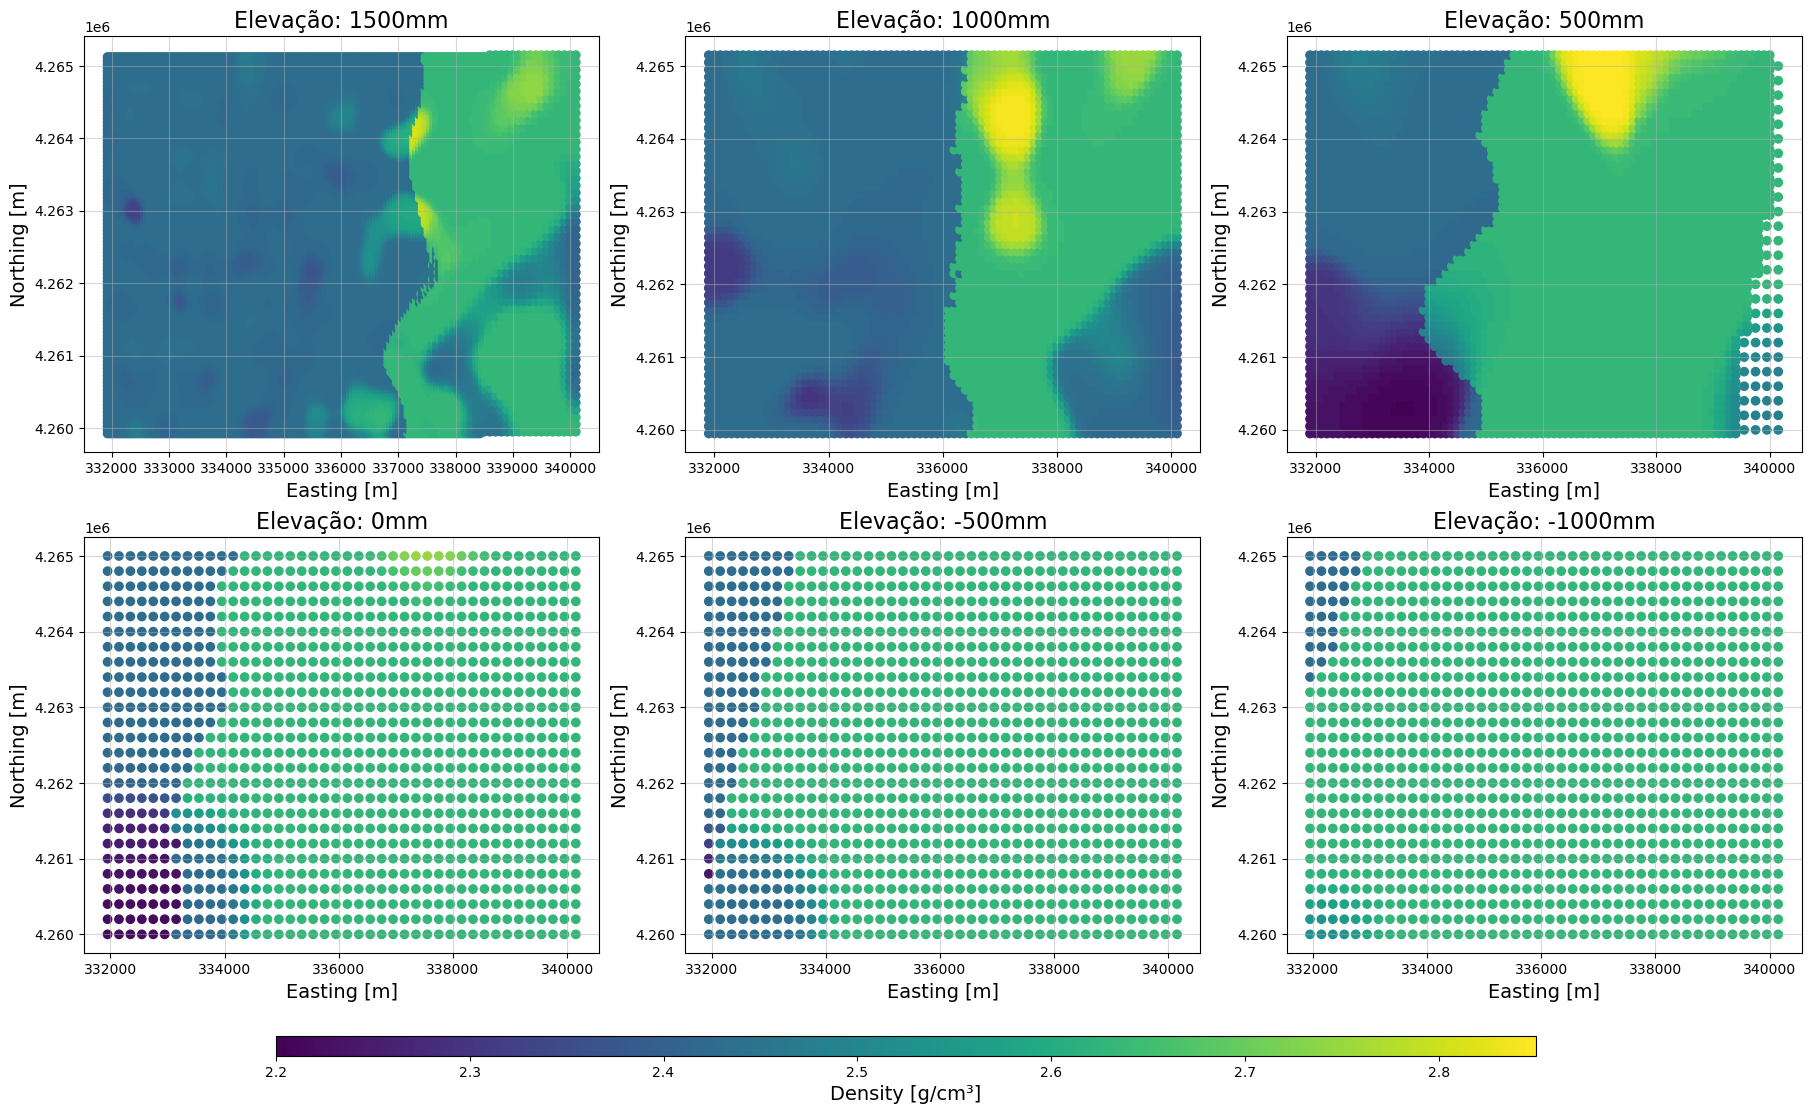

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# List of DataFrames and their respective elevations
df_dict = {
    "1500m": df_density_original_1500m,
    "1000m": df_density_original_1000m,
    "500m": df_density_original_500m,
    "0m": df_density_original_0m,
    "-500m": df_density_original_minus500m,
    "-1000m": df_density_original_minus1000m,
}

def plot_density_subplots(df_dict, font_size=12, cmap="viridis", grid_alpha=0.3, legend_position="bottom"):
    """
    Cria um plot com subplots para cada DataFrame, mostrando a densidade em função de Easting e Northing.
    
    Parâmetros:
    - df_dict: Dicionário contendo os DataFrames organizados por elevação.
    - font_size: Tamanho das fontes dos eixos e títulos.
    - cmap: Escolha do colormap para os plots.
    - grid_alpha: Transparência do grid (0 = invisível, 1 = opaco).
    - legend_position: Posição da legenda de cor (bottom, top, left, right).
    """

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

    # Find global density values to standardize the scale
    all_densities = np.concatenate([df["Density[g/cm3]"].values for df in df_dict.values()])
    vmin, vmax = np.min(all_densities), np.max(all_densities)

    # Loop over the DataFrames and axes
    for ax, (label, df) in zip(axes.flatten(), df_dict.items()):
        sc = ax.scatter(df["Easting[m]"], df["Northing[m]"], c=df["Density[g/cm3]"], cmap=cmap, vmin=vmin, vmax=vmax)
        
        # Axis configuration
        ax.set_xlabel("Easting [m]", fontsize=font_size)
        ax.set_ylabel("Northing [m]", fontsize=font_size)
        ax.set_title(f"Elevação: {label.replace('minus', '-')}m", fontsize=font_size + 2)
        ax.grid(alpha=grid_alpha)

    # Add a single color bar below the plot
    cbar_ax = fig.add_axes([0.15, -0.05, 0.7, 0.02])  # Ajustar posição (esquerda, altura, largura, espessura)
    cbar = fig.colorbar(sc, cax=cbar_ax, orientation="horizontal")
    cbar.set_label("Density [g/cm³]", fontsize=font_size)

    # Adjust the position of the color legend
    if legend_position == "top":
        cbar_ax.set_position([0.15, 0.93, 0.7, 0.02])
    elif legend_position == "left":
        cbar_ax.set_position([0.02, 0.15, 0.02, 0.7])
        cbar_ax.set_orientation("vertical")
    elif legend_position == "right":
        cbar_ax.set_position([0.92, 0.15, 0.02, 0.7])
        cbar_ax.set_orientation("vertical")

    # Display the plot
    plt.show()

# Execute the function with the DataFrames
plot_density_subplots(df_dict, font_size=14, cmap="viridis", grid_alpha=0.5, legend_position="bottom")
